In [43]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
imdb=pd.read_csv("IMDB Dataset.csv")

In [3]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
imdb.groupby("sentiment").count()

,review
sentiment,
negative,25000
positive,25000


In [6]:
data=imdb.iloc[:5000].copy()

In [7]:
# remove emoji function
def removeemoji(text):
    p=''.join(t if ord(t)<128 else '' for t in text)
    return p

In [8]:
data['review']=data['review'].apply(removeemoji)

In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

## extra words which are needed to be removed from analysis

In [12]:
from nltk.corpus import stopwords
stops=stopwords.words('english') 

import string
stops+=[w for w in string.punctuation]

In [13]:
from nltk import word_tokenize
from nltk import pos_tag

## finding part of speech of word

In [15]:
from nltk.corpus import wordnet

def get_simple_pos(word):
    if word.startswith('J'):
        return wordnet.ADJ
    if word.startswith('V'):
        return wordnet.VERB
    if word.startswith('N'):
        return wordnet.NOUN
    if word.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

In [16]:
data2=data.copy()

In [17]:
count=1
total=5000
import IPython
from IPython.display import clear_output

## removing stop word from our data using remove stop function

In [18]:
def removestops(text):
    global count
    global total
    count=count+1
    if count%50==0:
        clear_output()
        print((count*100)/total)
    
    letters_only = re.sub("[^a-zA-Z]", " ",text) 
    words = letters_only.lower().split()                  
    meaningful_words = ''
    for w in words:
        if w not in stops:
            p=w
            p=lem.lemmatize(w,pos=get_simple_pos(pos_tag([w])[0][1]))
            meaningful_words+=p.lower()+' '
    return meaningful_words

In [19]:
data.review=data.review.apply(removestops)

100.0


In [20]:
data.head()

,review,sentiment
0,one reviewer mention watch oz episode hooked r...,positive
1,wonderful little production br br film techniq...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stun fi...,positive


In [21]:
x=data.review
y=data.sentiment
xx=[]
for i in range(len(x)):
    xx.append(x[i])

## spliting our data into training and testing set using sklearn train_test_split

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xx,y,test_size=0.2,random_state=0)

## using tfidf vectorizer to vectorize the text into  words

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vec=Vectorizer(ngram_range=(1,2))
new_train=vec.fit_transform(x_train)

NameError: name 'Vectorizer' is not defined

In [70]:
test_x=vec.transform(x_test)

## using  naive bias to predict the sentiment

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

clf=MultinomialNB()
clf.fit(new_train,y_train)

sc=clf.score(test_x,y_test)
print(sc)
ans=clf.predict(test_x)

0.814


In [64]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,ans)





## visual representation using seaborn

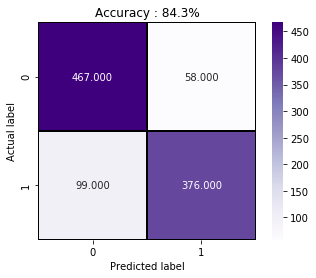

In [65]:
plt.plot(figsize=(10,10))
sbn.heatmap(cmat,annot=True,fmt=".3f",linewidths=.5,linecolor='Black',square=True,cmap='Purples')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy : {0}%'.format(sc*100)
plt.title(all_sample_title, size = 12)
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ans , y_test))

              precision    recall  f1-score   support

    negative       0.88      0.83      0.85       562
    positive       0.79      0.86      0.83       438

   micro avg       0.84      0.84      0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000

